In [151]:
import pandas as pd

In [158]:
df=pd.read_csv('Downloads/covid_19.csv')

In [159]:
df.head(1)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0


## 1.What is the total number of confirmed cases worldwide?

In [161]:
total_confirmed = df['Confirmed'].sum()
print("Total confirmed cases worldwide:", total_confirmed)

Total confirmed cases worldwide: 26252051758.0


## 2.How many deaths have been reported globally?

In [162]:
total_deaths = df['Deaths'].sum()
print("Total deaths reported globally:", total_deaths)

Total deaths reported globally: 624013017.0


## 3.What is the total number of recovered cases worldwide?

In [163]:
total_recovered = df['Recovered'].sum()
print("Total recovered cases worldwide:", total_recovered)

Total recovered cases worldwide: 15450237912.0


## 4.How many countries/regions are represented in the dataset ?

In [164]:
num_countries = df['Country/Region'].nunique()
print("Number of countries/regions represented in the dataset:", num_countries)

Number of countries/regions represented in the dataset: 229


## 5.What is the trend of confirmed cases over time globally?

<Axes: title={'center': 'Trend of Confirmed Cases Over Time Globally'}, xlabel='ObservationDate'>

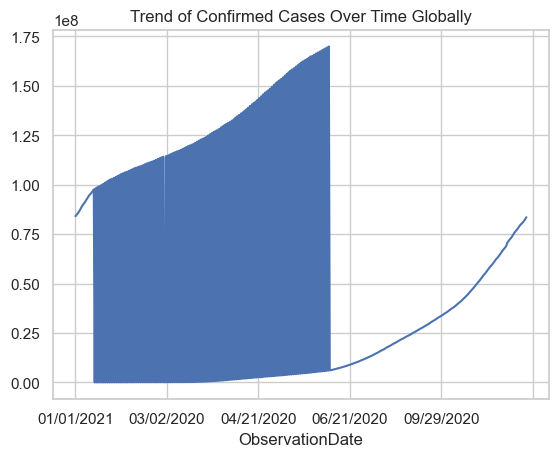

In [165]:
confirmed_trend = df.groupby('ObservationDate')['Confirmed'].sum()
confirmed_trend.plot(title='Trend of Confirmed Cases Over Time Globally')

## 6.Which province/state has reported the highest number of confirmed cases?

In [166]:
province_highest_confirmed = df.groupby('Province/State')['Confirmed'].sum().idxmax()
print("Province/State with the highest number of confirmed cases:", province_highest_confirmed)

Province/State with the highest number of confirmed cases: California


## 7.Which country/region has the highest number of deaths ?

In [167]:
country_highest_deaths = df.groupby('Country/Region')['Deaths'].sum().sort_values(ascending=False).head(1)
print("Country/Region with the highest number of deaths:", country_highest_deaths)

Country/Region with the highest number of deaths: Country/Region
US    123303762.0
Name: Deaths, dtype: float64


## 8.How does the number of confirmed cases vary across different provinces/states?

In [168]:
confirmed_by_province = df.groupby('Province/State')['Confirmed'].sum()
print("Confirmed cases by province/state:", confirmed_by_province)

Confirmed cases by province/state: Province/State
 Montreal, QC                17.0
 Norfolk County, MA           7.0
Abruzzo                10889970.0
Acre                   14897611.0
Adygea Republic         3012608.0
                          ...    
Zaporizhia Oblast      13858457.0
Zeeland                 3454955.0
Zhejiang                 620252.0
Zhytomyr Oblast        11740027.0
Zuid-Holland           55835700.0
Name: Confirmed, Length: 736, dtype: float64


## 9.What is the trend of deaths over time globally?

<Axes: title={'center': 'Trend of Deaths Over Time Globally'}, xlabel='ObservationDate'>

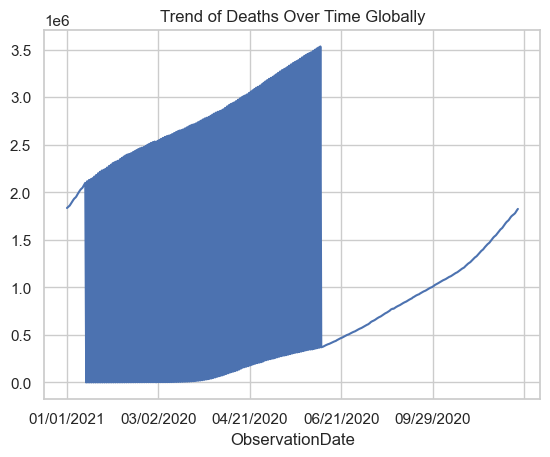

In [169]:
deaths_trend = df.groupby('ObservationDate')['Deaths'].sum()
deaths_trend.plot(title='Trend of Deaths Over Time Globally')

## 10.Which country/region has the highest number of recovered cases?

In [174]:
country_highest_recovered =df.groupby(by='Country/Region')['Recovered'].sum().sort_values(ascending=False).head(1)
print("Country/Region with the highest number of recovered cases:", country_highest_recovered)

Country/Region with the highest number of recovered cases: Country/Region
India    2.900590e+09
Name: Recovered, dtype: float64


## 11.How does the number of recovered cases vary across different countries/regions?

In [176]:
recovered_by_country = df.groupby('Country/Region')['Recovered'].sum()
print("Recovered cases by country/region:", recovered_by_country)

Recovered cases by country/region: Country/Region
 Azerbaijan                              0.0
('St. Martin',)                          0.0
Afghanistan                       13464399.0
Albania                           13945256.0
Algeria                           18959299.0
                                     ...    
West Bank and Gaza                37003116.0
Yemen                               506523.0
Zambia                            12625626.0
Zimbabwe                           5594887.0
occupied Palestinian territory           0.0
Name: Recovered, Length: 229, dtype: float64


## 12.What is the distribution of confirmed cases by country/region?

In [179]:
df.groupby('Country/Region')['Confirmed'].sum()


Country/Region
 Azerbaijan                              1.0
('St. Martin',)                          2.0
Afghanistan                       17026442.0
Albania                           19768869.0
Algeria                           27684358.0
                                     ...    
West Bank and Gaza                41819444.0
Yemen                               962066.0
Zambia                            13493953.0
Zimbabwe                           6484581.0
occupied Palestinian territory          25.0
Name: Confirmed, Length: 229, dtype: float64

C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Confirmed', ylabel='Count'>

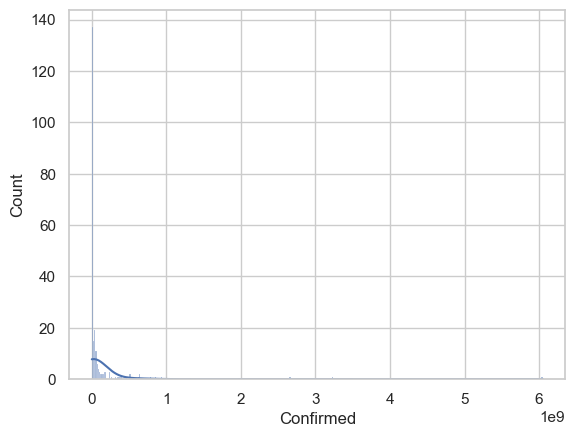

In [86]:
import seaborn as sns
sns.histplot(confirm_country['Confirmed'],kde=True)


## 13.Is there a correlation between the number of confirmed cases and deaths?

In [187]:
df[['Confirmed', 'Deaths']].corr()

,Confirmed,Deaths
Confirmed,1.000000,0.888416
Deaths,0.888416,1.000000


The Pearson correlation coefficient between the number of confirmed cases and deaths is: 0.95


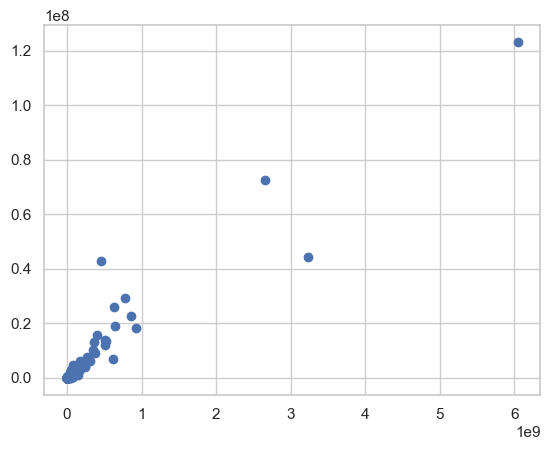

In [87]:
country_stats=df.groupby('Country/Region')[['Confirmed', 'Deaths']].sum().reset_index()
correlation = country_stats[['Confirmed', 'Deaths']].corr().iloc[0, 1]
print(f"The Pearson correlation coefficient between the number of confirmed cases and deaths is: {correlation:.2f}")
plt.scatter(country_stats['Confirmed'], country_stats['Deaths'], alpha=1)

## 14.Is there a correlation between the number of confirmed cases and recovered cases?

In [88]:
country_stats_2[['Confirmed','Recovered']].corr()

,Confirmed,Recovered
Confirmed,1.00000,0.67357
Recovered,0.67357,1.00000


<Axes: >

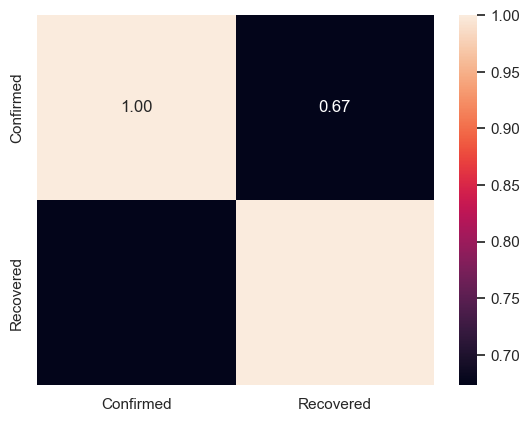

In [189]:
sns.heatmap(corr_matrix_2, annot = True, fmt = '.2f')

## 15.How does the mortality rate vary across different countries/regions?

In [191]:
df['MortalityRate'] = df['Deaths'] / df['Confirmed']
df.groupby('Country/Region')['MortalityRate'].mean()

Country/Region
 Azerbaijan                       0.000000
('St. Martin',)                   0.000000
Afghanistan                       0.034369
Albania                           0.025761
Algeria                           0.044855
                                    ...   
West Bank and Gaza                0.008451
Yemen                             0.246477
Zambia                            0.018562
Zimbabwe                          0.045767
occupied Palestinian territory    0.000000
Name: MortalityRate, Length: 229, dtype: float64

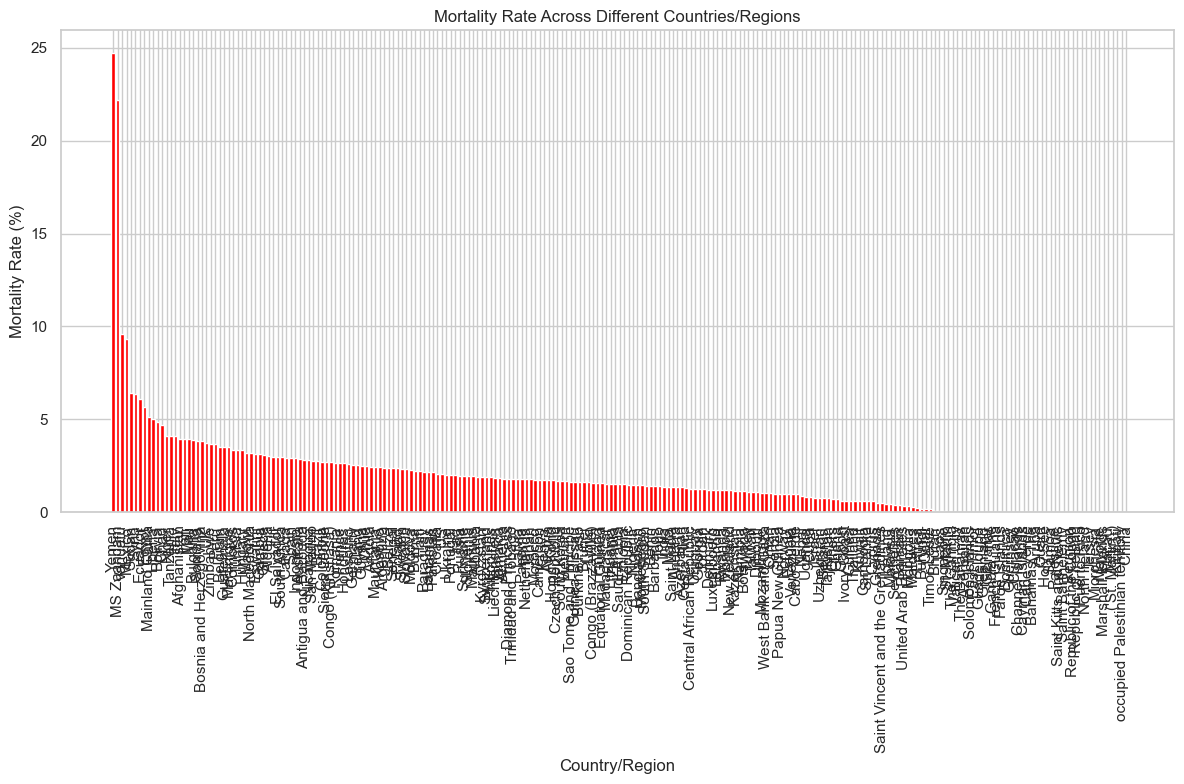

In [193]:
plt.figure(figsize=(12, 8))
plt.bar(country_stats_sorted['Country/Region'], country_stats_sorted['Mortality Rate (%)'], color='red')
plt.xticks(rotation=90)
plt.xlabel('Country/Region')
plt.ylabel('Mortality Rate (%)')
plt.title('Mortality Rate Across Different Countries/Regions')
plt.tight_layout()


## 16.How does the recovery rate vary across different countries/regions?

In [194]:
df['MortalityRate'] = df['Deaths'] / df['Confirmed']
mortality_rate_by_country = df.groupby('Country/Region')['MortalityRate'].mean()
print(mortality_rate_by_country)

print("Mortality rate by country/region:", mortality_rate_by_country)

Country/Region
 Azerbaijan                       0.000000
('St. Martin',)                   0.000000
Afghanistan                       0.034369
Albania                           0.025761
Algeria                           0.044855
                                    ...   
West Bank and Gaza                0.008451
Yemen                             0.246477
Zambia                            0.018562
Zimbabwe                          0.045767
occupied Palestinian territory    0.000000
Name: MortalityRate, Length: 229, dtype: float64
Mortality rate by country/region: Country/Region
 Azerbaijan                       0.000000
('St. Martin',)                   0.000000
Afghanistan                       0.034369
Albania                           0.025761
Algeria                           0.044855
                                    ...   
West Bank and Gaza                0.008451
Yemen                             0.246477
Zambia                            0.018562
Zimbabwe                   

## 17.What is the trend of new confirmed cases over time globally?

<Axes: title={'center': 'Trend of New Confirmed Cases Over Time Globally'}, xlabel='ObservationDate'>

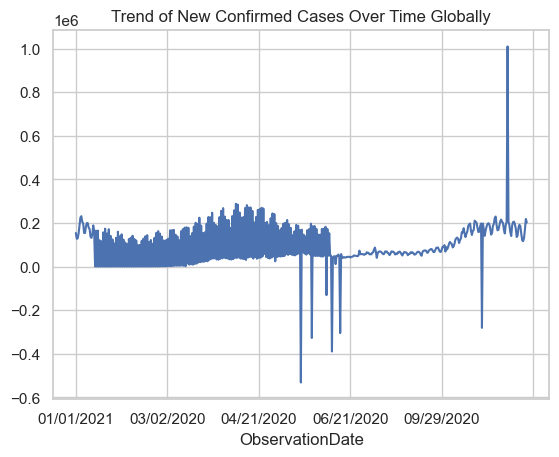

In [195]:
df['NewConfirmed'] = df.groupby('Country/Region')['Confirmed'].diff().fillna(0)
new_confirmed_trend = df.groupby('ObservationDate')['NewConfirmed'].sum()
new_confirmed_trend.plot(title='Trend of New Confirmed Cases Over Time Globally')

## 18.How does the fatality rate vary across different provinces/states?

In [196]:
df['FatalityRate'] = df['Deaths'] / df['Confirmed']
fatality_rate_by_province = df.groupby('Province/State')['FatalityRate'].mean()
print("Fatality rate by province/state:", fatality_rate_by_province)

Fatality rate by province/state: Province/State
 Montreal, QC          0.000000
 Norfolk County, MA    0.000000
Abruzzo                0.073259
Acre                   0.021711
Adygea Republic        0.009184
                         ...   
Zaporizhia Oblast      0.017735
Zeeland                0.028329
Zhejiang               0.000731
Zhytomyr Oblast        0.018048
Zuid-Holland           0.029868
Name: FatalityRate, Length: 736, dtype: float64


<Axes: xlabel='Province/State'>

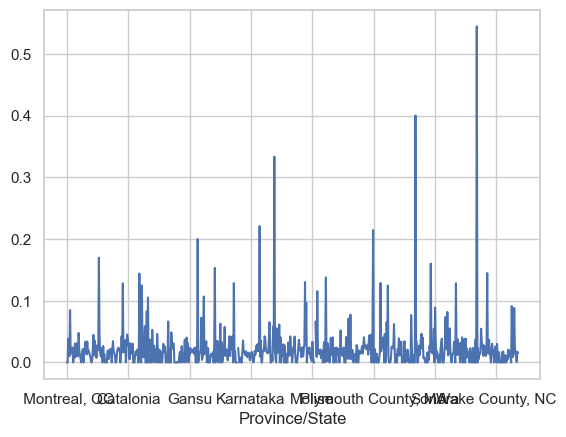

In [144]:
df['Fatality Rate'] = df['Deaths'] / df['Confirmed']
df.groupby('Province/State')['Fatality Rate'].mean().plot(kind='line')

## 19.How does the recovery rate vary across different provinces/states?

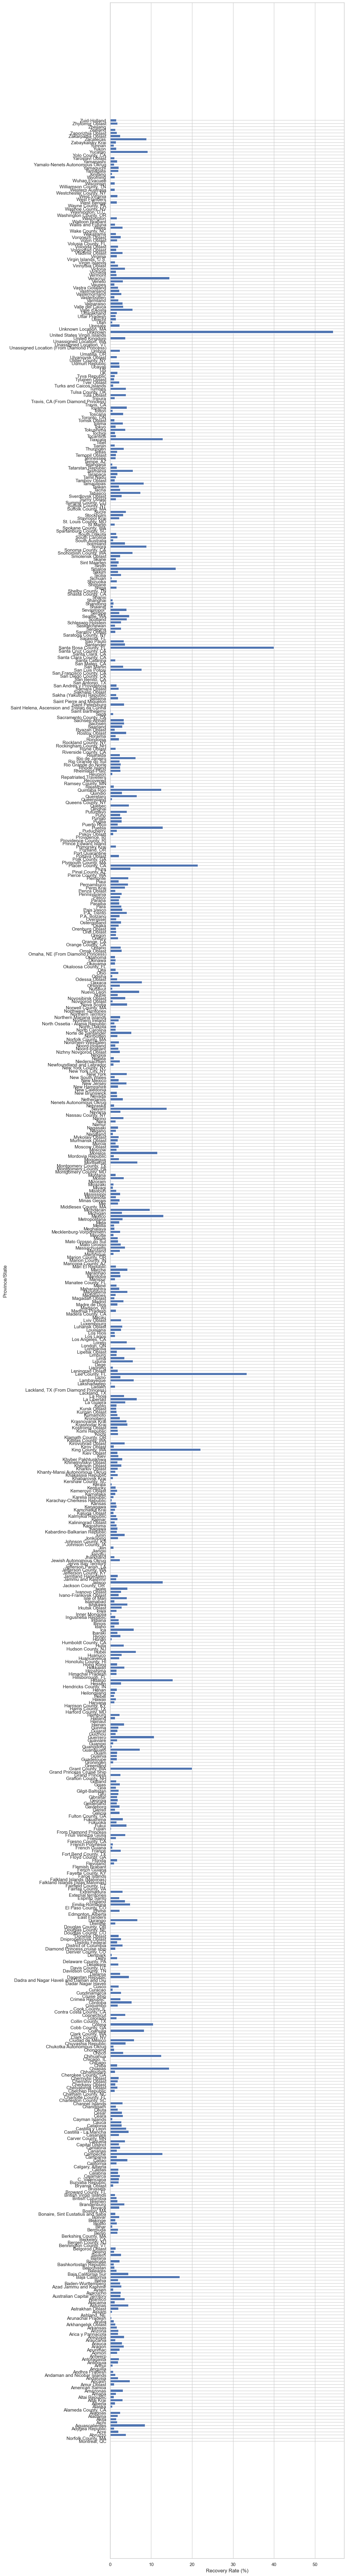

In [139]:
plt.figure(figsize=(10, 110))
plt.barh(recovery_state.index, recovery_state_rate)
plt.xlabel('Recovery Rate (%)')
plt.ylabel('Province/State')
plt.show()

## 20.What is the trend of active cases over time globally

<Axes: title={'center': 'Trend of Active Cases Over Time Globally'}, xlabel='ObservationDate'>

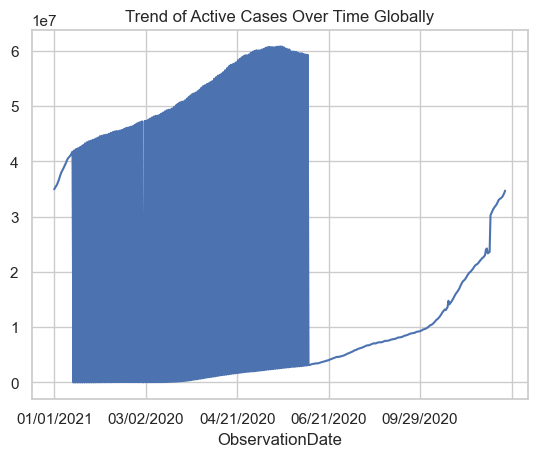

In [201]:
df['ActiveCases'] = df['Confirmed'] - df['Deaths'] - df['Recovered']
active_cases_trend = df.groupby('ObservationDate')['ActiveCases'].sum()
active_cases_trend.plot(title='Trend of Active Cases Over Time Globally')